# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

1. Berapa banyak sepedah yang disewakan ketika workingday?
2. Bulan apa saja sewa sepeda memiliki penyewaan tertinggi?
3. Jam berapa Rata-Rata tertinggi dalam penyewaan sepedah dari tahun 2011 s.d 2012?

## Import Semua Packages/Library yang Digunakan

In [128]:
import pandas as pd # Library untuk operasi data
import numpy as np # Library untuk operasi matematika
import matplotlib.pyplot as plt # Library untuk visualisasi data/plotting
import seaborn as sns # Library untuk visualisasi data/plotting korelasi
from matplotlib.ticker import FuncFormatter #untuk menghilangkan format angka

## Data Wrangling

### Gathering data


 Dataset ```Bike Sharing``` yang merupakan dataset yang diambil dari Kaggle oleh Dicoding.
 Dataset ini berisi informasi jumlah sepeda sewaan per jam dan per hari antara tahun 2011 dan 2012 di sistem berbagi sepeda Capital dengan informasi cuaca dan musim yang sesuai.

 Informasi tersebut dibagi menjadi jadi 2 csv yaitu sepeda sewaan perjam(hour.csv) dan sewaan per hari(day.csv)


In [129]:
"""
DO: Membaca file dataset dari folder data dan menampilkan 5 data pertama dari file day.csv

"""

data_day = pd.read_csv('data/day.csv')
data_day.head() # Menampilkan 5 data pertama

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [130]:
data_day.tail() # DO: Menampilkan 5 data terakhir

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [131]:
"""

DO: Membaca file dataset dari folder data dan menampilkan 5 data pertama dari file hour.csv

"""

data_hour = pd.read_csv('data/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [132]:
data_hour.tail() # DO: Menampilkan 5 data terakhir

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Pada data day.csv terdapat 731 row dan 16 fitur

In [133]:
data_day.shape


(731, 16)

Pada data hour.csv terdapat 17379 row dan 17 fitur

In [134]:
data_hour.shape

(17379, 17)

### Assesing data
Informasi dari kolom yang kita dapatkan dari csv:

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Mari konversi data agar mudah dipahami ketika membaca data tersebut, ada beberapa kolom yang akan di konversi seperti ```season```, ```year```, ```weathersit```, ```month```

Rencana yang akan dikonversi pada kolom tersebut sebagai berikut:

Before:

1. ```season```: 1 s.d 4
2. ```year```: 0(2011) s.d 1(2012)
3. ```weathersit```: 1 s.d 4
4. ```month```: 1.sd 12
5. ```dteday```: Type data string

After:

1. ```season```: springer s.d winter
2. ```year```: 2011 / 2012
3. ```weathersit```: clear, misty,Light rain, Heavy Rain
4. ```month```: January s.d December
5. ```dteday```: Type data datetime

In [135]:
# Mengecek value kosong pada data day dan hour
print(data_day.isnull().sum())
print()
print(data_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [136]:
# Mengecek data duplikat pada data day dan hour
print(data_day.duplicated().sum())
print()
print(data_hour.duplicated().sum())

0

0


In [137]:
# Mengecek tipe data dari kolom dteday apakah bertipe object(string) atau datetime
dtDay = data_day['dteday'].dtype == 'object'
dtDay


True

Ternyata dteday tipedatanya datetime mari kita konversi ke datetime

In [138]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

is_dteday_datetime = data_day['dteday'].dtype == 'datetime64[ns]'
is_dteday_datetime


True

In [139]:
"""
Melakukan konversi terhadap 5 fitur season, year, month, dan weathersit pada dataset day.csv dan hour.csv

"""

data_day['season'] = data_day['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data_hour['season'] = data_hour['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

data_day['yr'] = data_day['yr'].replace({0: 2011, 1: 2012})
data_hour['yr'] = data_hour['yr'].replace({0: 2011, 1: 2012})

data_day['month'] = data_day['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
data_hour['month'] = data_hour['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data_day['weathersit'] = data_day['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
data_hour['weathersit'] = data_hour['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

data_day['weekday'] = data_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
data_hour['weekday'] = data_hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})


In [140]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,2011-01-01,Springer,2011,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,January
1,2,2011-01-02,Springer,2011,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,January
2,3,2011-01-03,Springer,2011,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,January
3,4,2011-01-04,Springer,2011,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,January
4,5,2011-01-05,Springer,2011,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,January


In [141]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,2011-01-01,Springer,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,January
1,2,2011-01-01,Springer,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,January
2,3,2011-01-01,Springer,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,January
3,4,2011-01-01,Springer,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,January
4,5,2011-01-01,Springer,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,January


#### Cek Outlier data day

Cek Outlier data_day pada setiap fitur

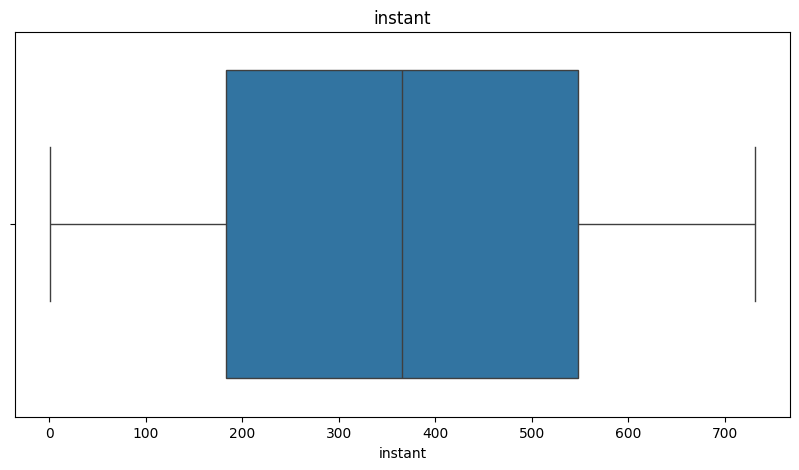

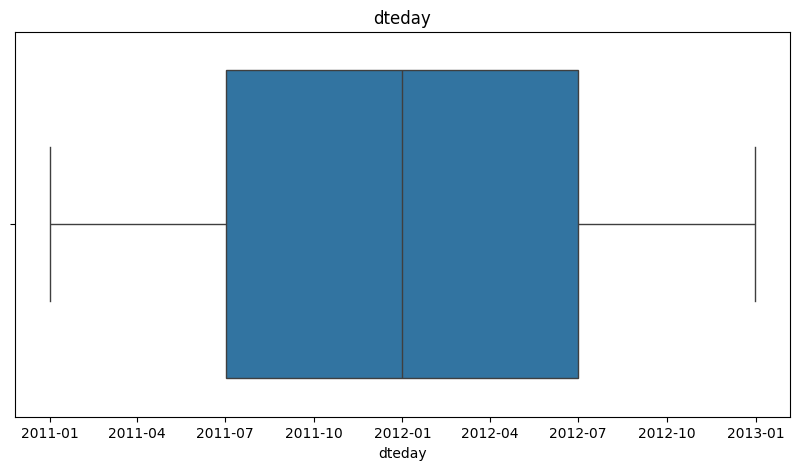

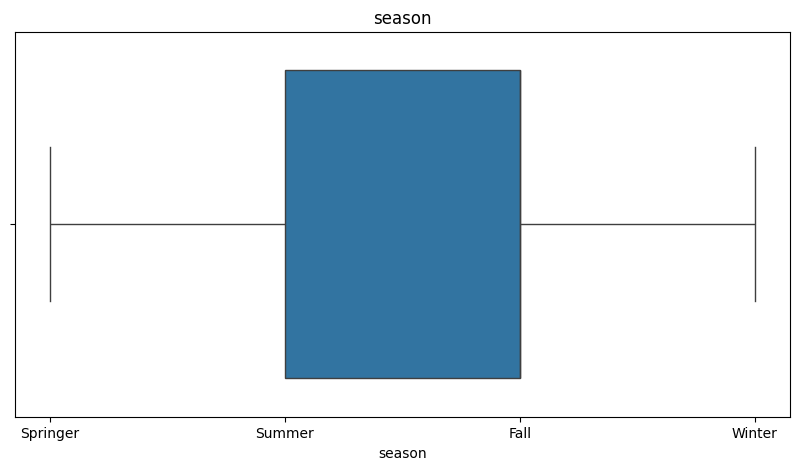

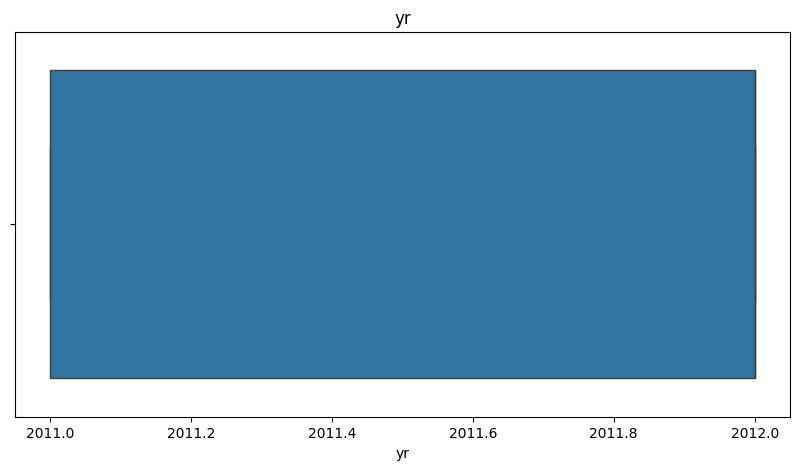

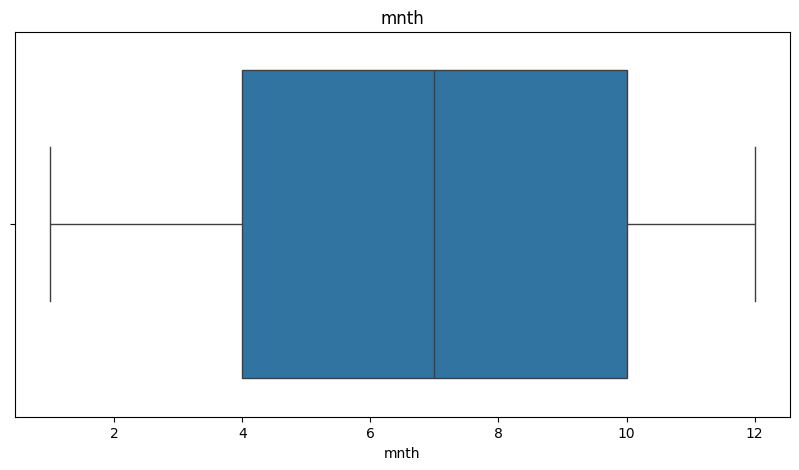

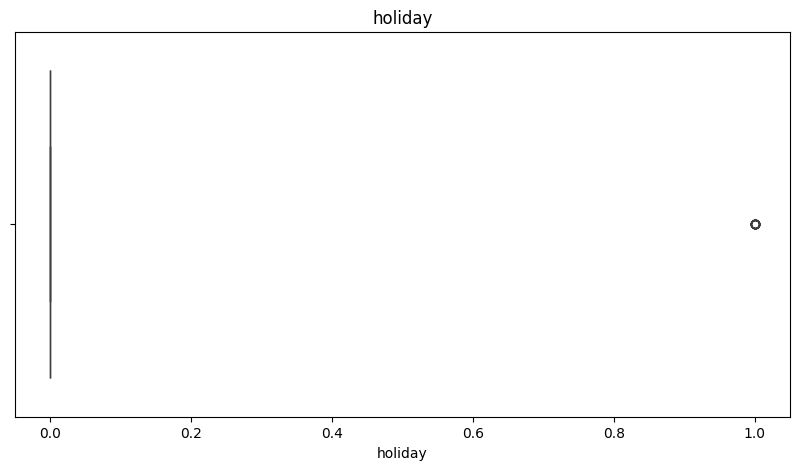

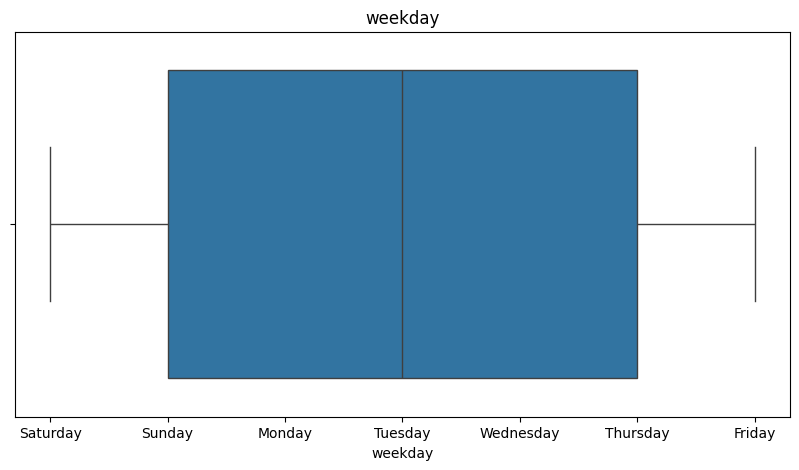

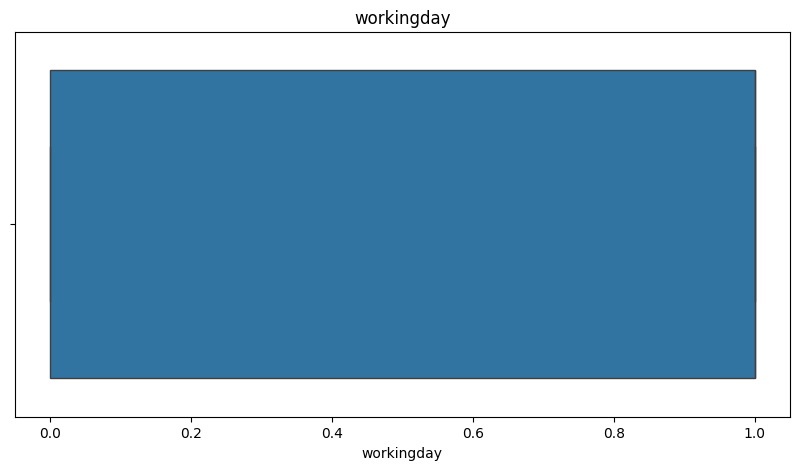

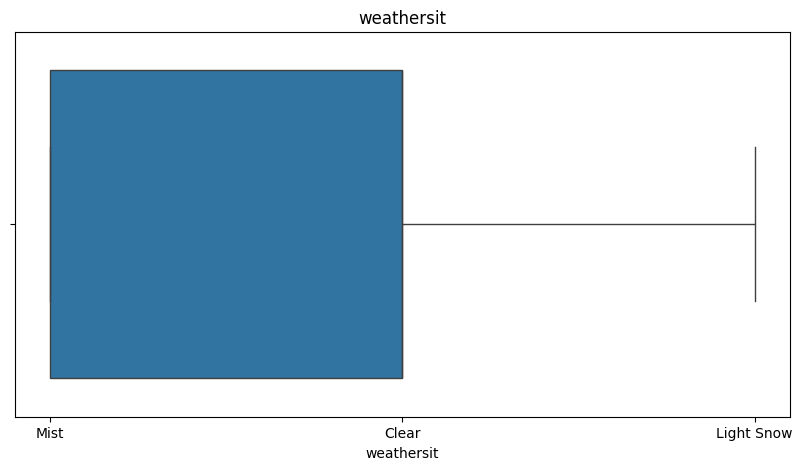

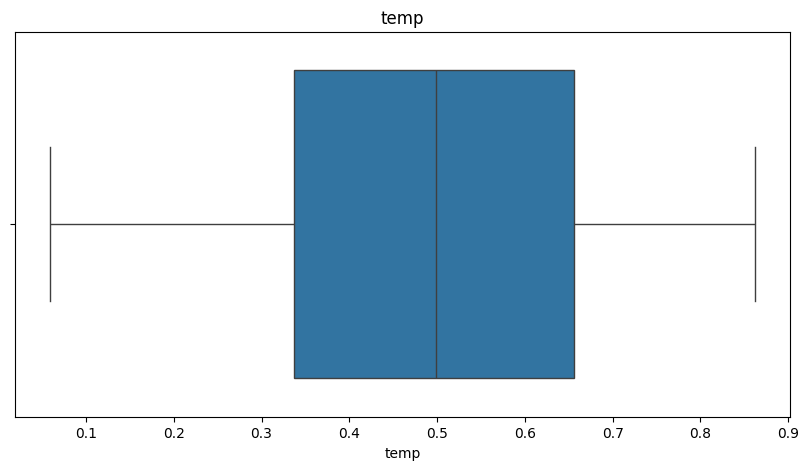

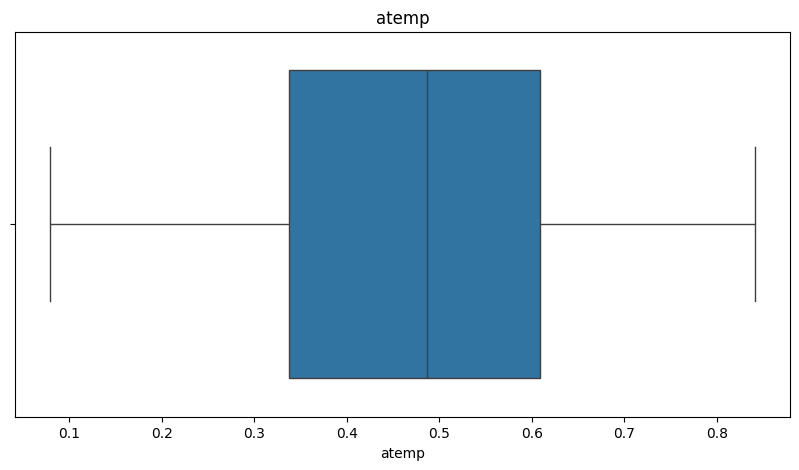

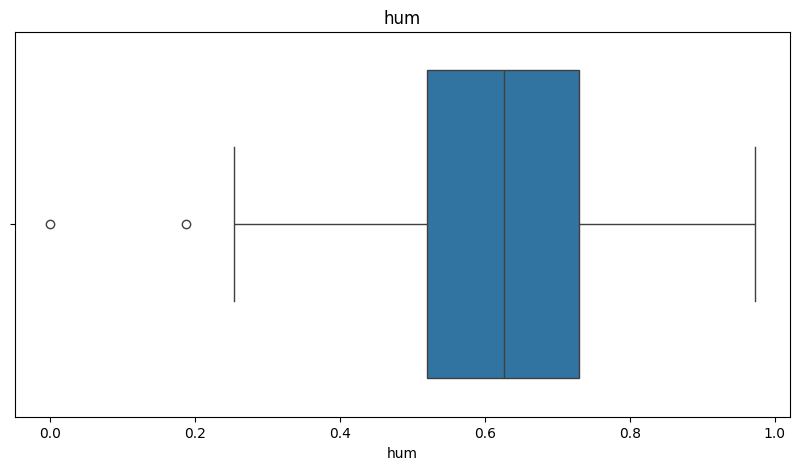

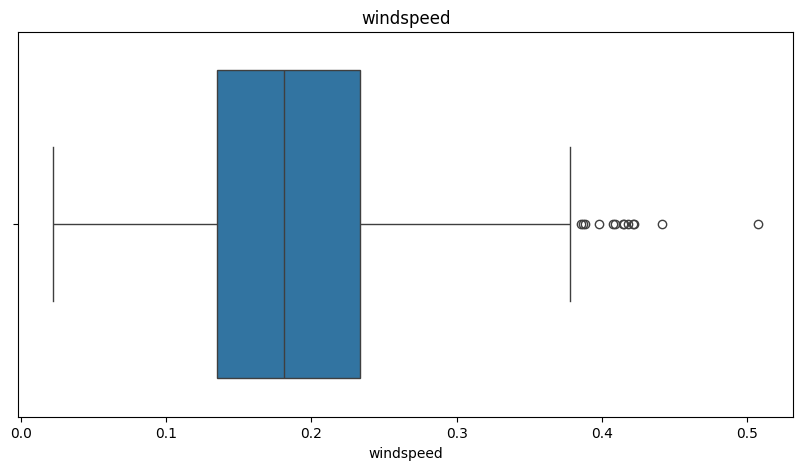

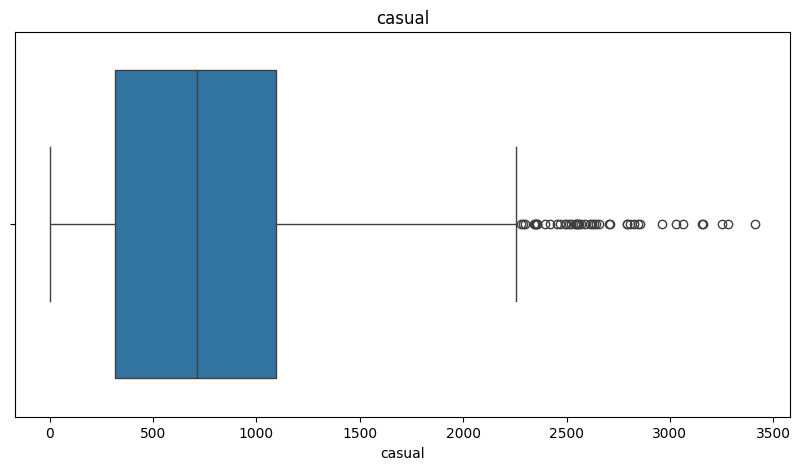

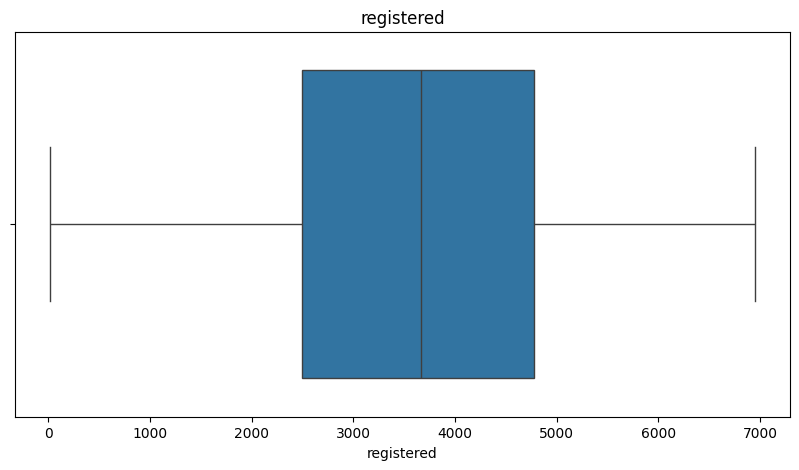

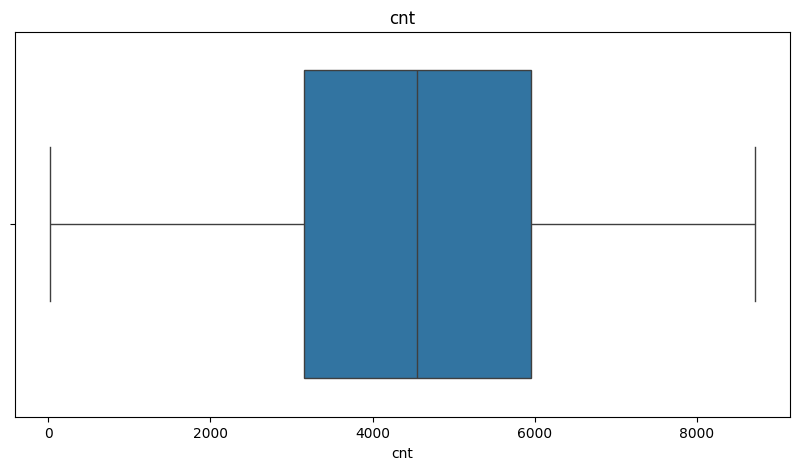

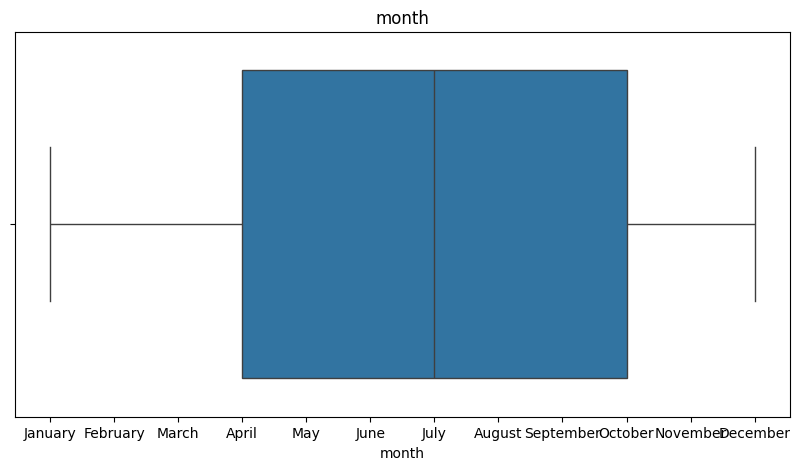

In [142]:
# cek Outlier seluruh fitur pada data day
for i in data_day.columns:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data_day[i], orient='h')
    plt.title(i)
    
    plt.show()

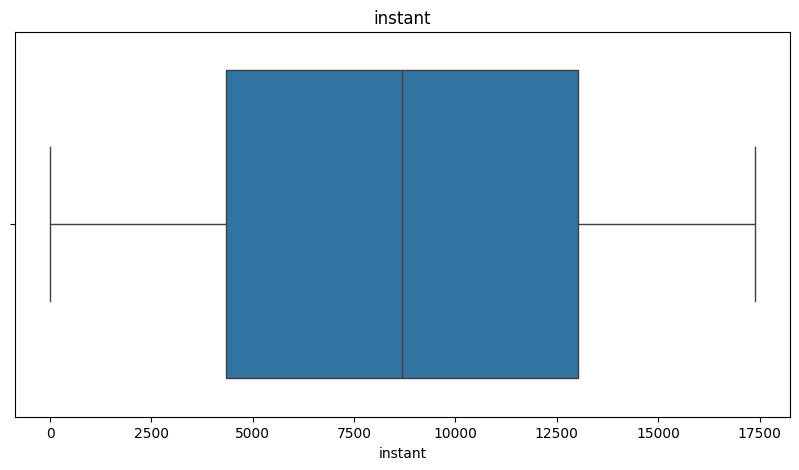

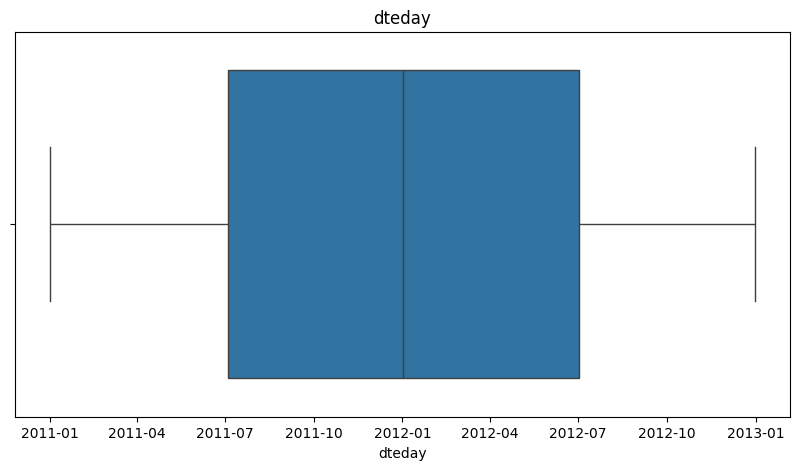

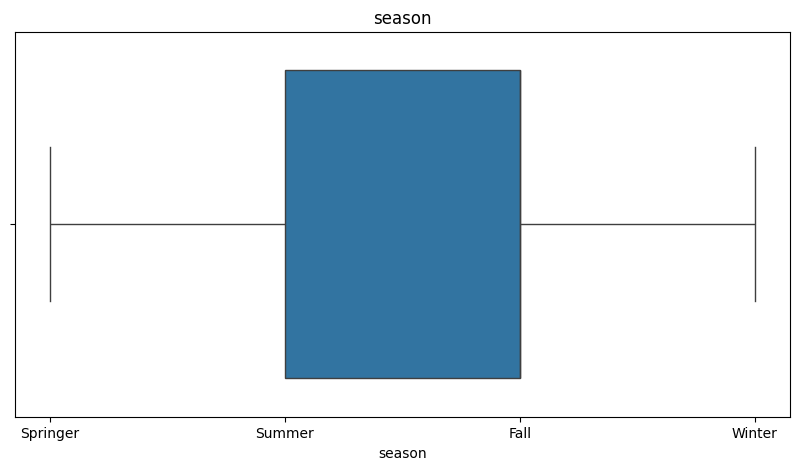

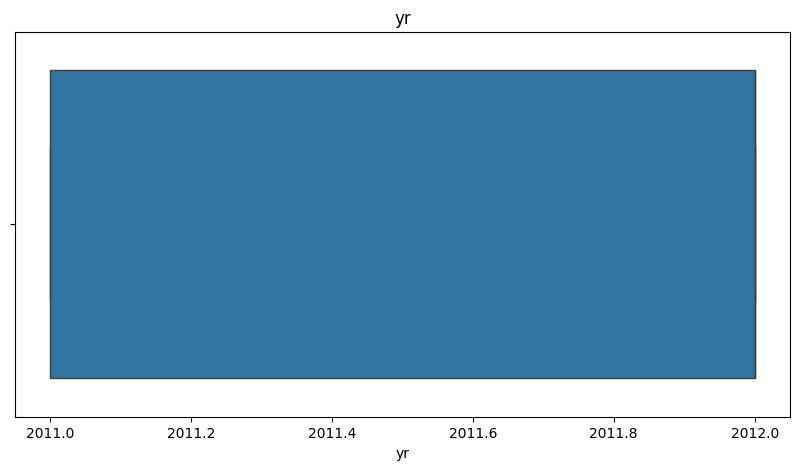

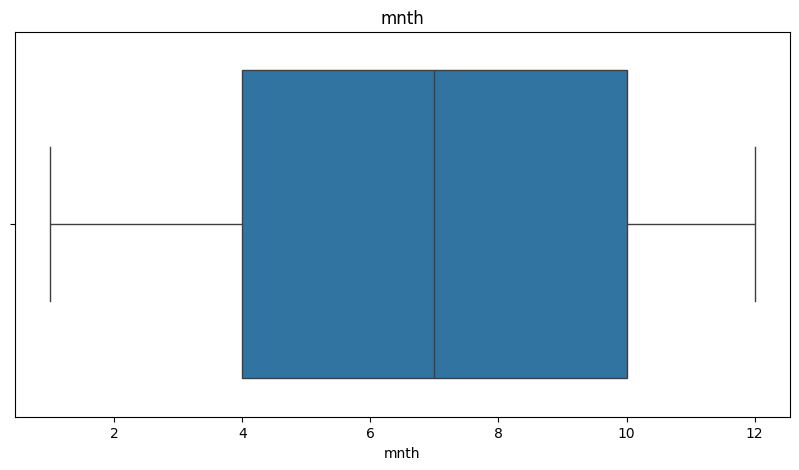

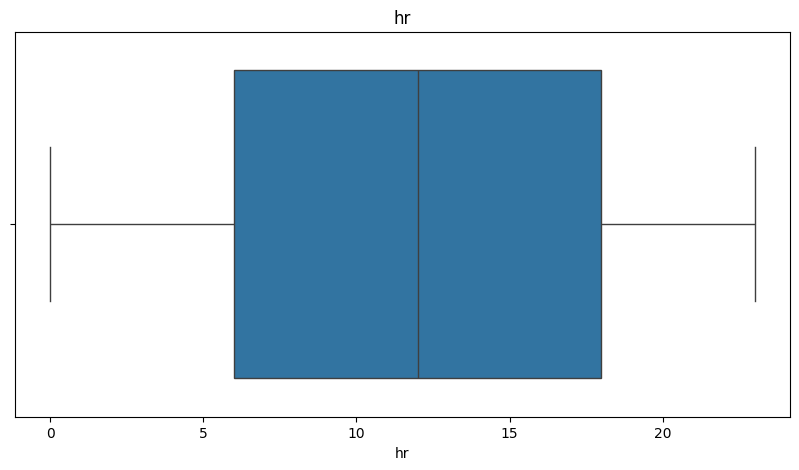

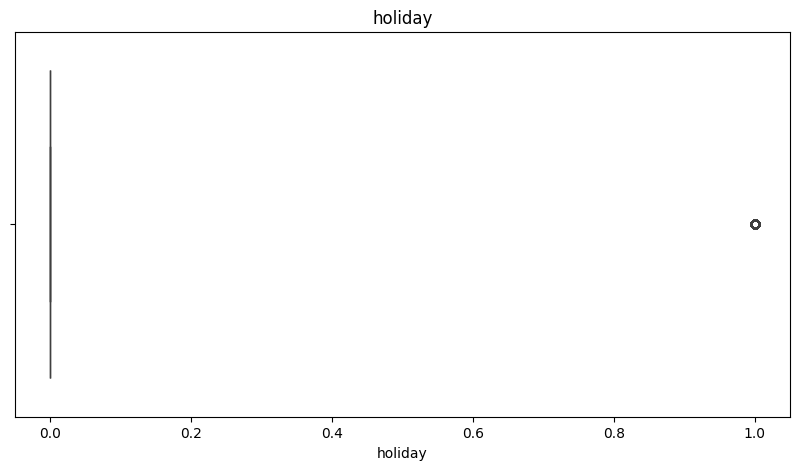

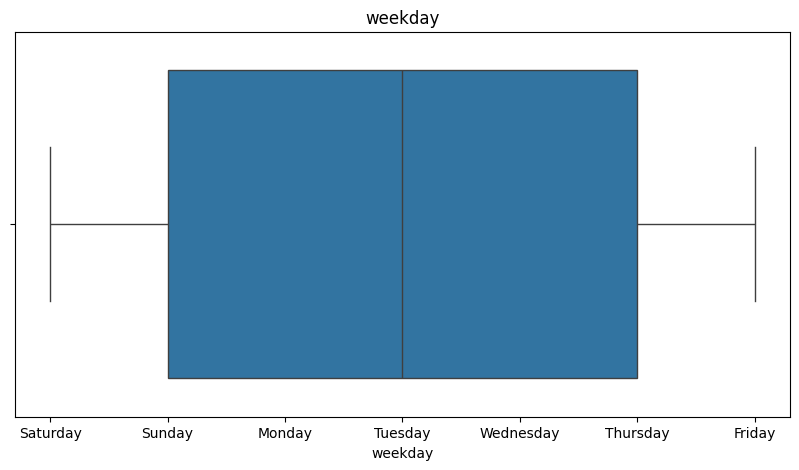

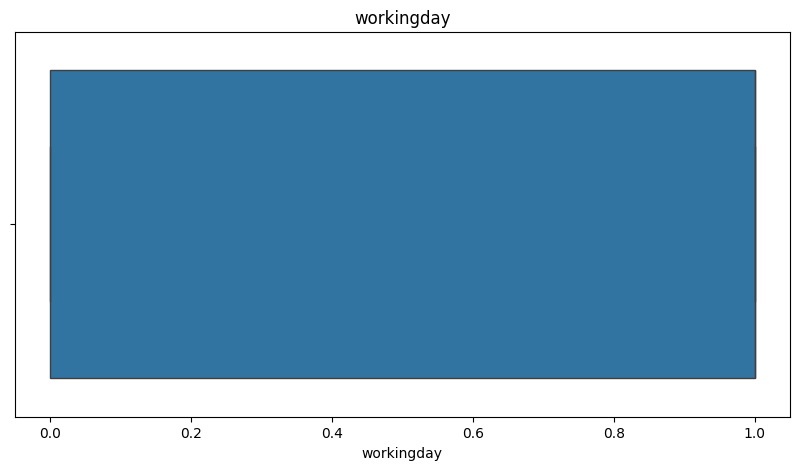

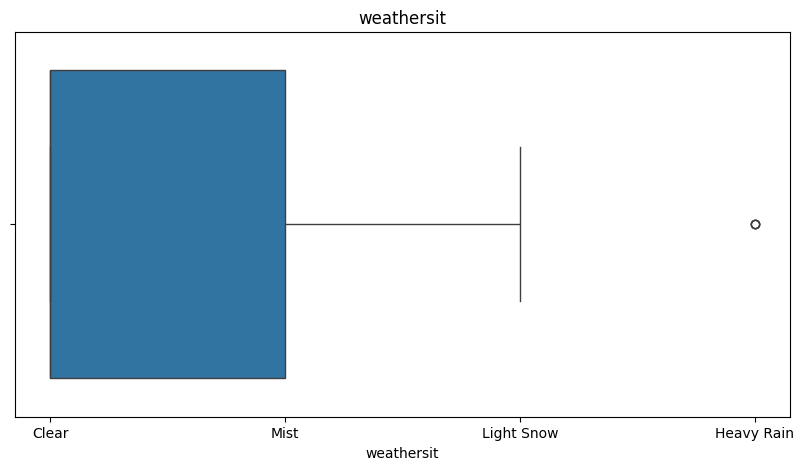

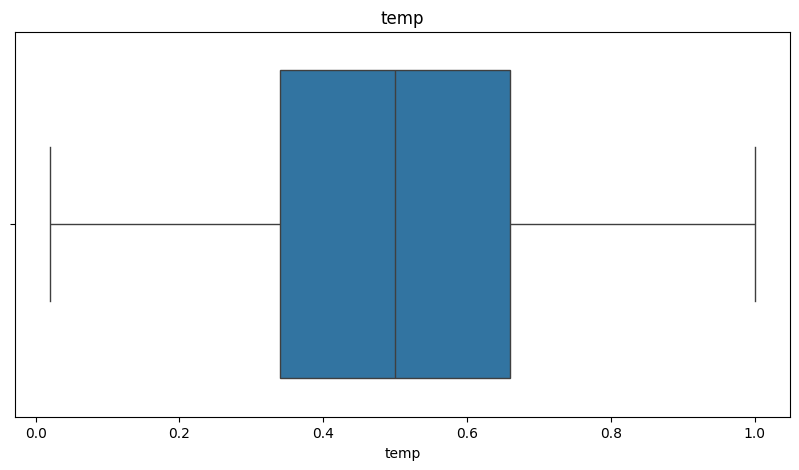

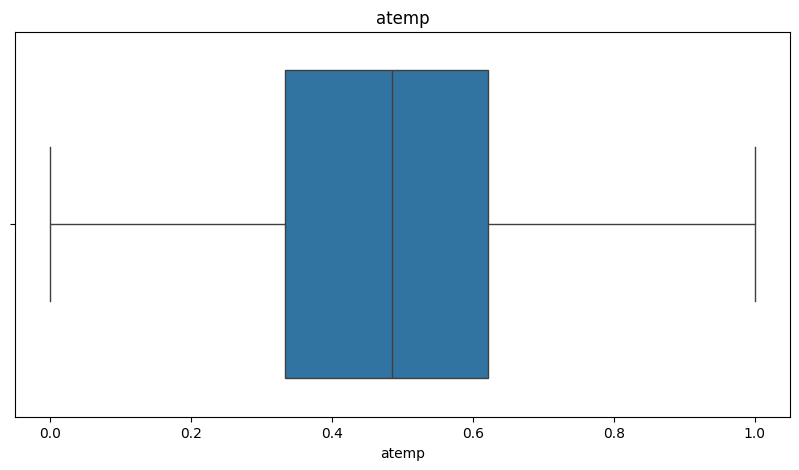

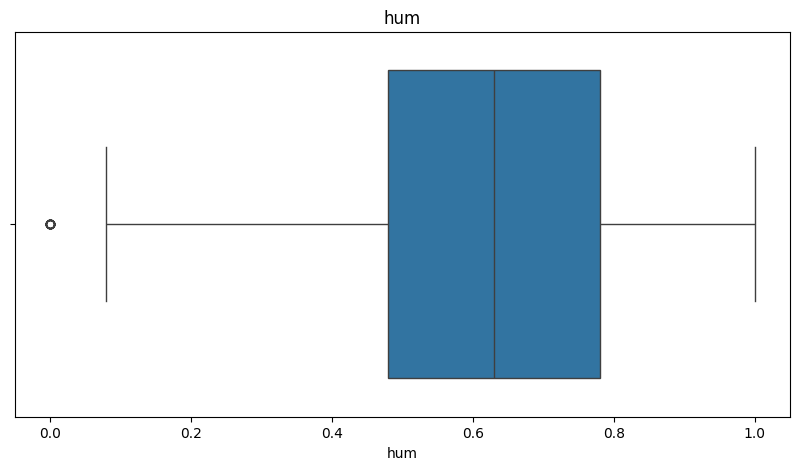

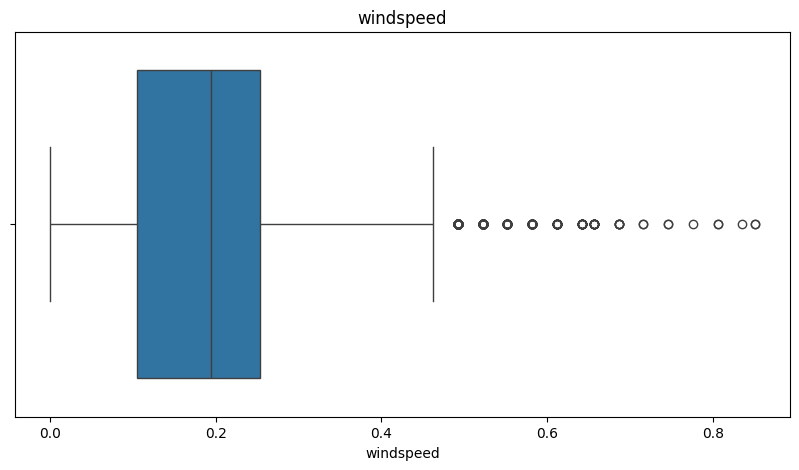

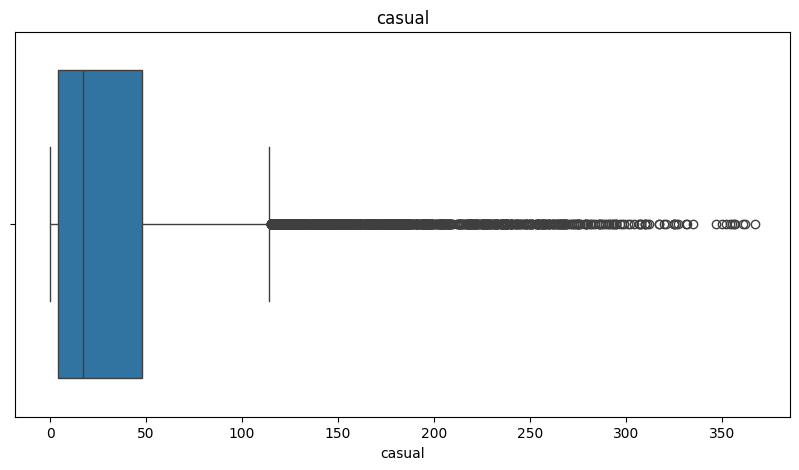

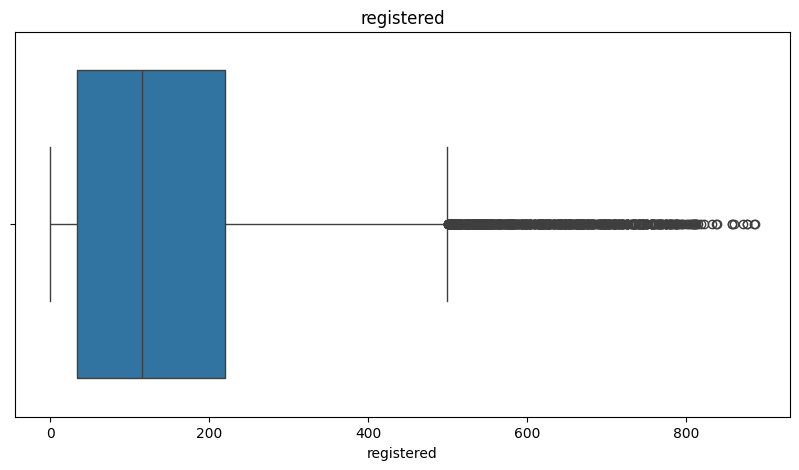

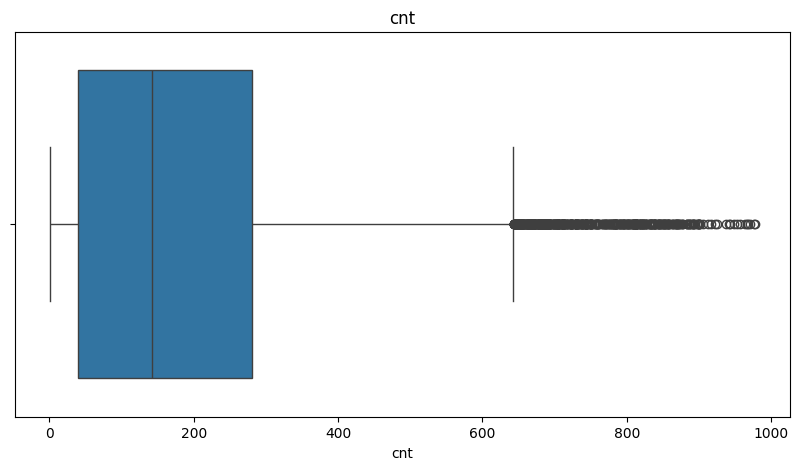

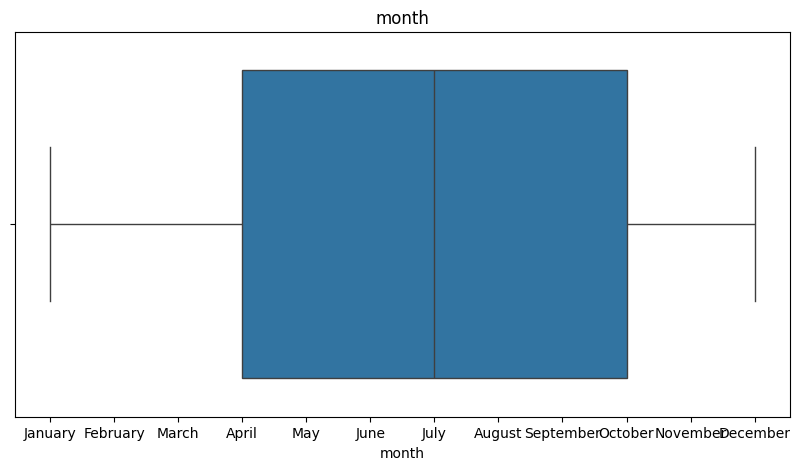

In [143]:
# cek Outlier seluruh fitur pada data hour 
for i in data_hour.columns:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data_hour[i], orient='h')
    plt.title(i)
    
    plt.show()

### Cleaning Data
Terlihat ada beberapa fitur yang memiliki outlier seperti casual, windspeed, hum untuk data_day dan weathersit, hum, windspeed, casual, akan digantikan menjadi value rata-rata

Kecuali holiday karena valuenya pada fitur tersebut adalah binary(0/1)

In [144]:
def median_outlier(data, outlier_features):
    for i in data.columns:
        if data[i].dtype != 'object':
            if i in outlier_features:
                Q1 = data[i].quantile(0.25)
                Q3 = data[i].quantile(0.75)
                
                IQR = Q3 - Q1
                
                lower_bound = Q1 - (1.5 * IQR)
                upper_bound = Q3 + (1.5 * IQR)
                
                data[i] = np.where(data[i] > upper_bound, data[i].median(), data[i])
                data[i] = np.where(data[i] < lower_bound, data[i].median(), data[i])
            
    return data

data_day = median_outlier(data_day, ['hum','windspeed','casual'])
data_hour = median_outlier(data_hour, ['weathersit','hum','windspeed','casual'])


## Exploratory Data Analysis (EDA)

In [145]:
data_day.describe()

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,0.028728,0.683995,0.495385,0.474354,0.629352,0.186295,730.865937,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,0.000000,0.000000,0.337083,0.337842,0.522291,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.229785,999.500000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.378108,2258.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,0.465233,0.183051,0.162961,0.139566,0.071153,505.495353,1560.256377,1937.211452


Mari kita cek terhadap korelasi antar fitur pada data day dan data hour

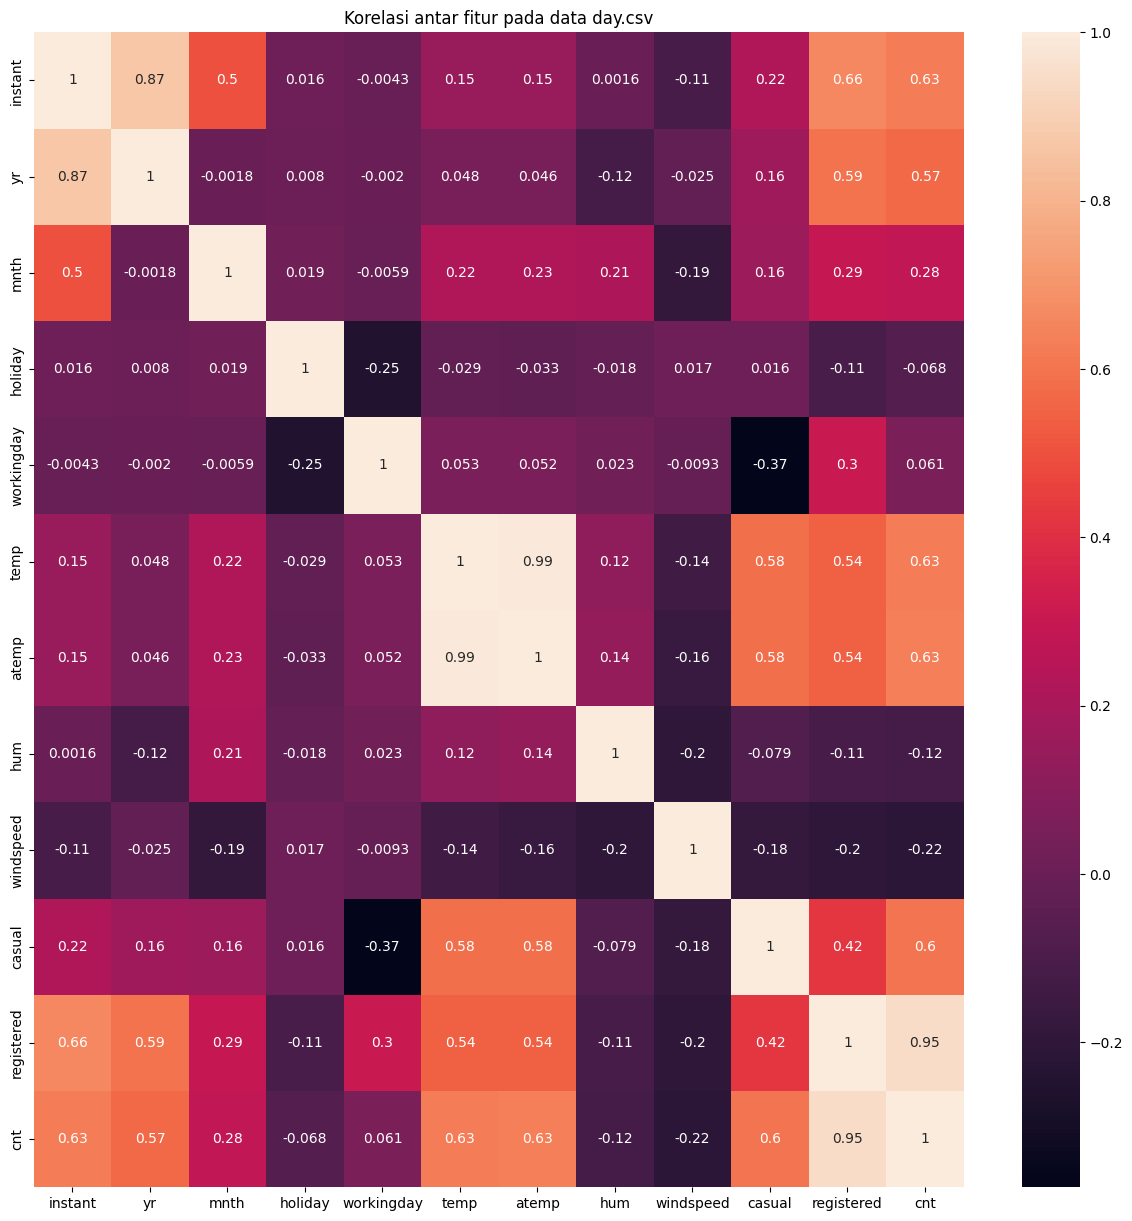

In [146]:
# DO: Cek korelasi antar fitur menggunakan heatmap dari data day.csv
plt.figure(figsize=(15, 15))
sns.heatmap(data_day.select_dtypes(include=['number']).corr(), annot=True)
plt.title('Korelasi antar fitur pada data day.csv')
plt.show()

Kita lihat pada cnt dan working dan pada korleasi tidak terlalu jelas karena mendapatkan nilai 0.061 pada data day

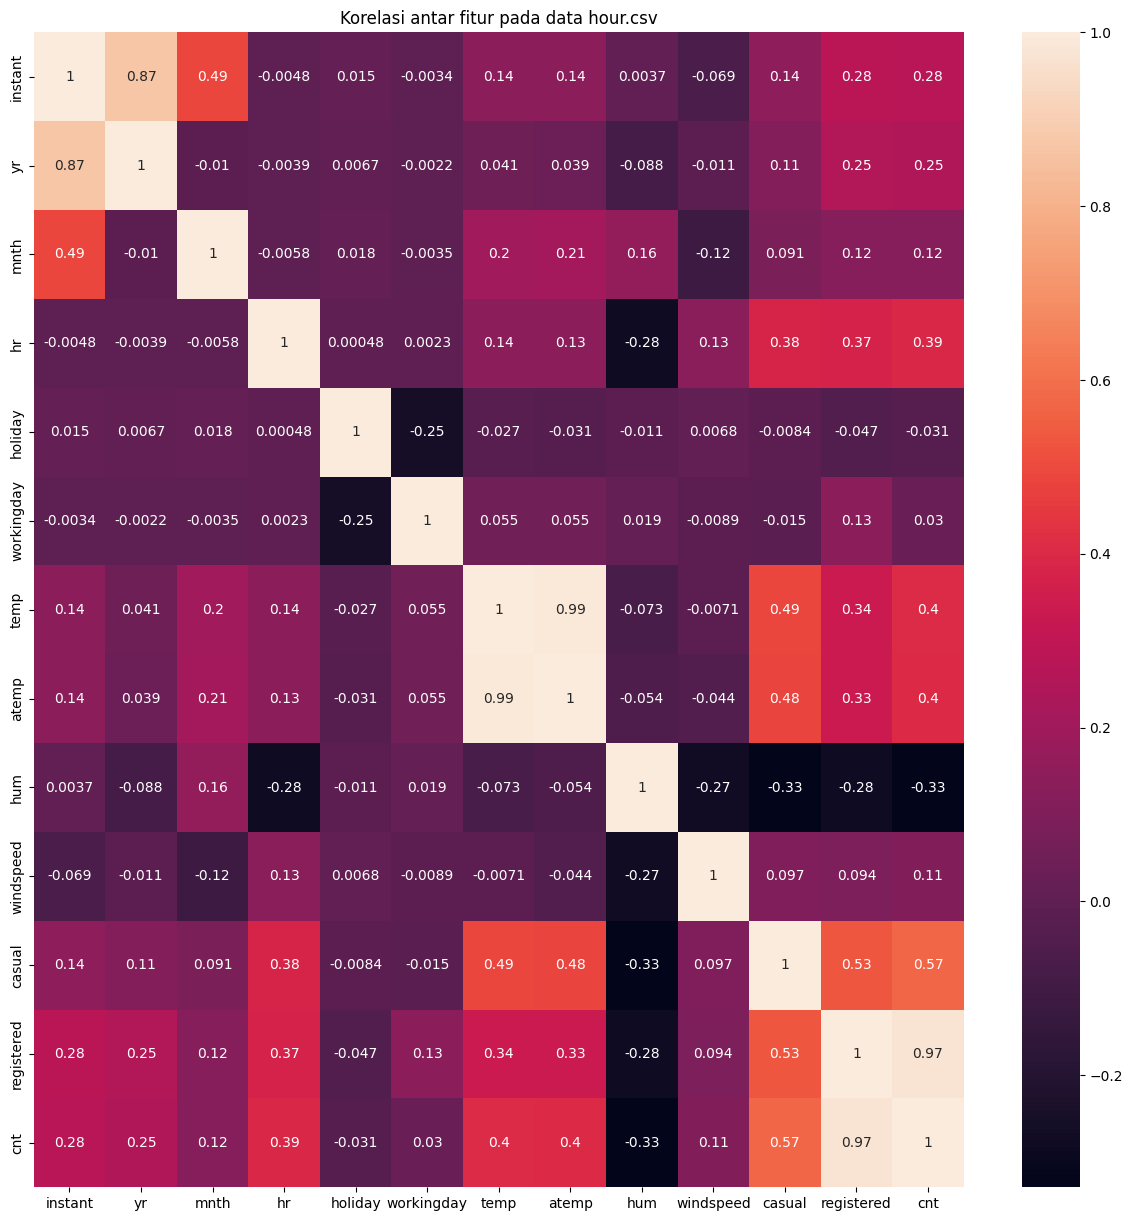

In [147]:
# DO: Cek korelasi antar fitur menggunakan heatmap dari data hour.csv
plt.figure(figsize=(15, 15))
sns.heatmap(data_hour.select_dtypes(include=['number']).corr(), annot=True)
plt.title('Korelasi antar fitur pada data hour.csv')
plt.show()

Kita lihat pada cnt dan working dan pada korleasi tidak terlalu jelas karena mendapatkan nilai 0.03 data hour

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak sepedah yang disewakan ketika workingday?

Dengan melihat korelasi pada heatmap data day dan data hour terlihat kedua 2 data tersebut korelasinya mendekati 0 bisa diartikan korelasi tersebut tidak cukup baik. Mungkin bisa kita lihat perbandingan activity day dan non activity pada visualisasi.

C:\Users\ichwa\AppData\Local\Temp\ipykernel_15544\3127607347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=working_day.index, y=working_day.values, palette='Set2')


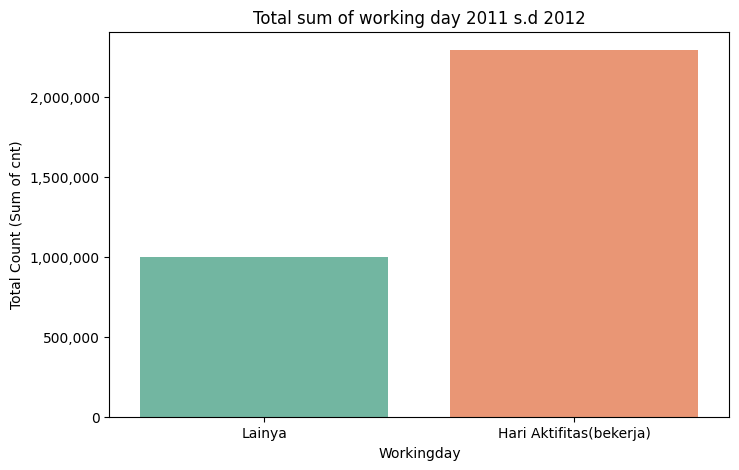

In [148]:
# Hitung jumlah total cnt untuk setiap kategori workingday
working_day = data_day.groupby('workingday')['cnt'].sum()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=working_day.index, y=working_day.values, palette='Set2')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total sum of activity day 2011 s.d 2012')
plt.xlabel('Workingday')
plt.ylabel('Total Count (Sum of cnt)')
plt.xticks(ticks=[0, 1], labels=['Lainya', 'Hari Aktifitas(bekerja)'])
plt.show()

Pada working day pada tahun 2011 s.d 2012, terlihat dengan key 1 adalah Activity Day dan 0 Otherwise(Non activity day) memiliki perbedaan cukup jauh pada bar activity day(aktifitas) mencapai 2292410 sedangkan Otherwise mencapai 1000269

In [149]:
print(working_day)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


### Pertanyaan 2: Bulan apa saja sewa sepeda memiliki penyewaan tertinggi?

C:\Users\ichwa\AppData\Local\Temp\ipykernel_15544\1584855879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=working_day_every_month['yr'].astype(str) + '-' + working_day_every_month['month'].astype(str), y=working_day_every_month['cnt'], palette='Set2')


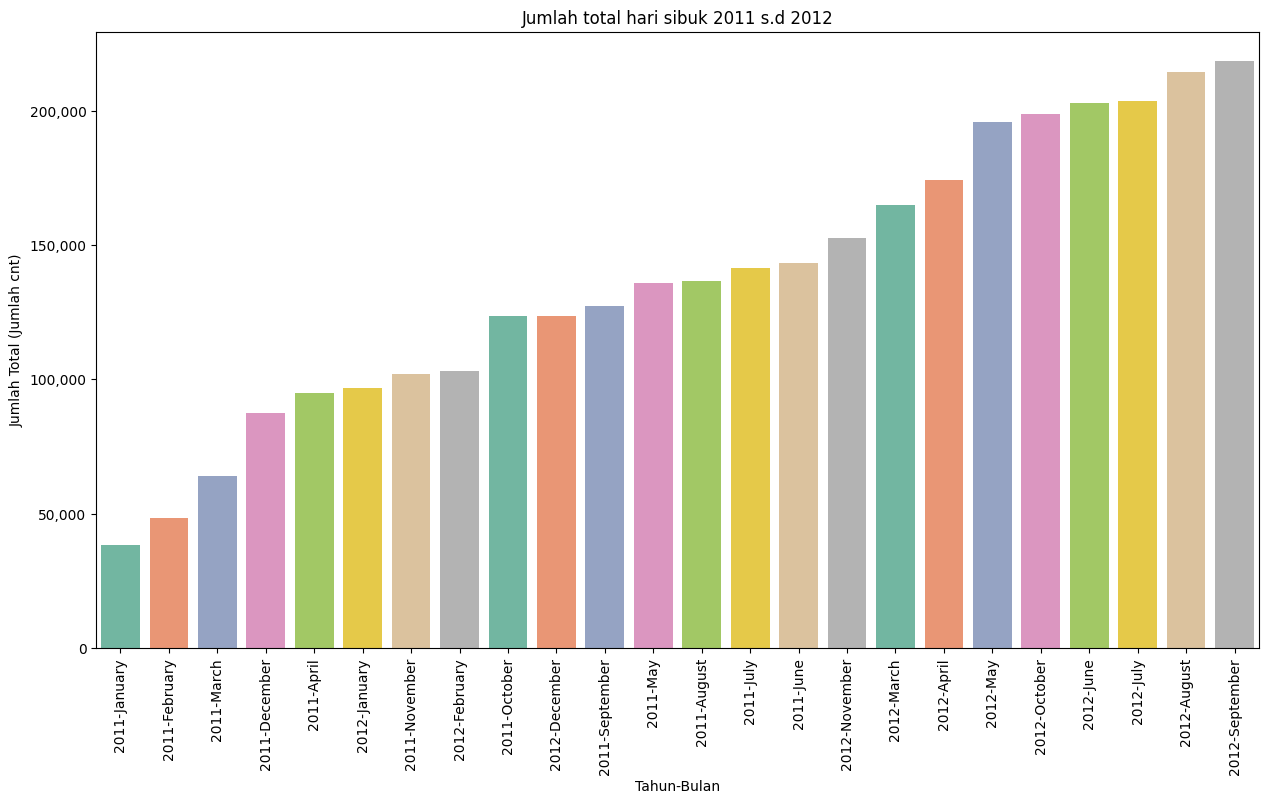

In [150]:
working_day_every_month = data_day.groupby(['yr', 'month'])['cnt'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=working_day_every_month['yr'].astype(str) + '-' + working_day_every_month['month'].astype(str), y=working_day_every_month['cnt'], palette='Set2')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Penyewaan bulanan 2011 s.d 2012')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Total (Jumlah cnt)')
plt.xticks(rotation=90)
plt.show()


Terlihat pada 1 tahun 2011 s.d 2012 puncak peminjaman sepedah pada tahun 2012 di bulan september

### Pertanyaan 3: Jam berapa Rata-Rata tertinggi dalam penyewaan sepedah dari tahun 2011 s.d 2012?

C:\Users\ichwa\AppData\Local\Temp\ipykernel_15544\3821534756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg['hr'], y=avg['cnt'], palette='Set2')


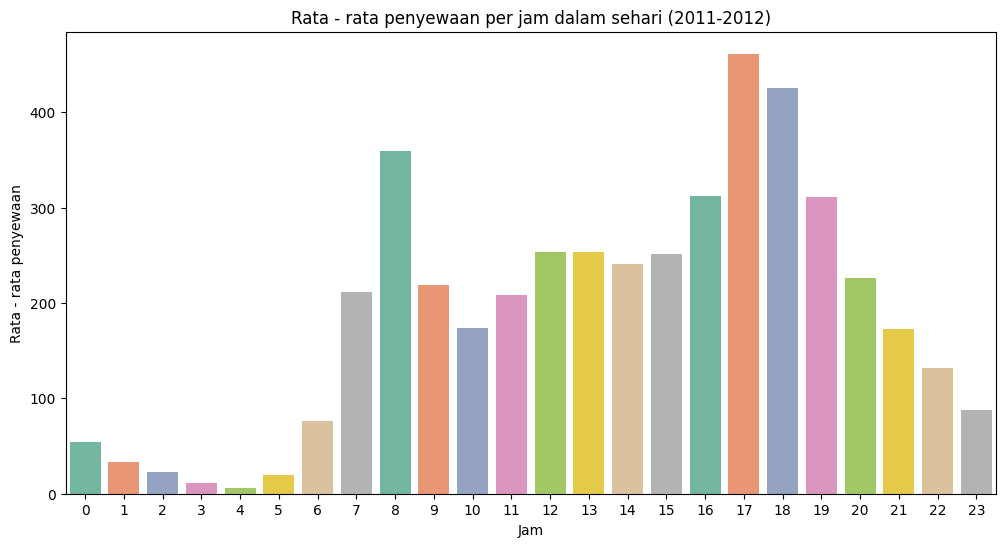

In [161]:
avg = data_hour.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg['hr'], y=avg['cnt'], palette='Set2')

plt.title('Rata - rata penyewaan per jam dalam sehari (2011-2012)')
plt.xlabel('Jam')
plt.ylabel('Rata - rata penyewaan')
plt.show()


Terlihat rata-rata jumlah penyewaan perjam dalam 1 tahun(2011 s.d 2012) terlihat pada pukul 8 pagi bisa terhadap aktifitas bekerja, bisa kita lihat pada ```pertanyaan ke 2``` aktifitas bekerja lebih banyak dibandingkan otherwise. Pada barplot tersebut awal mulainya aktifitas pada pukul 7 dan pada pukul 21 mulainya menurun karena sudah larut malam.

dapat disimpulkan pada pukul 8 dan pukul 17 mengalami peningkatan secara drastis.

## Conclusion

<hr>
Pertanyaan 1: Berapa banyak sepedah yang disewakan ketika workingday??

Jawab: Ketika aktifitas bekeja(workingday) sepeda yang dipinjamkan sebanyak 2292410, dan lainya 1000269 
<hr>
Pertanyaan 2: Bulan apa saja sewa sepeda memiliki penyewaan tertinggi?

Jawab: 
1. Peringkat tertinggi pada tahun 2012 Bulan September paling tertinggi
2. Peringkat kedua pada tahun 2012 Bulan Agustus
3. Peringkat ketiga pada tahun 2012 Bulan July

<hr>
Pertanyaan 3: Jam berapa Rata-Rata tertinggi dalam penyewaan sepedah dari tahun 2011 s.d 2012?

Jawab: rata-rata tertinggi terdapat pada pukul 8 dan pukul 17.
<hr>

In [154]:
#Export data day dan data hour yang telah dibersihkan dari outlier
data_day.to_csv("./dashboard/clean_dataDay.csv", index=False)
data_hour.to_csv("./dashboard/clean_dataHour.csv", index=False)
